In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
reduced = pd.read_csv("../reduced.csv")
reduced = reduced.drop(columns = reduced.columns[0])

In [2]:
plt.scatter(reduced.tmhalfsc, reduced.scores)

NameError: name 'plt' is not defined

In [4]:
base_X = reduced.drop(columns="scores")
base_y = reduced["scores"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(base_X, base_y, test_size=0.25)

In [6]:
base_lm = LinearRegression()
base_lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
base_lm_r2 = base_lm.score(X_test, y_test)
base_lm_pred = base_lm.predict(X_test)

In [8]:
def rmse(pred, y):
    n = len(y)
    RMSE = sqrt(sum((pred - y)**2) / n)
    return RMSE

In [9]:
base_lm_RMSE = rmse(base_lm_pred, y_test)

In [10]:
print(f"Baseline Linear Regression RMSE: {base_lm_RMSE:.3f}")
print(f"Baseline Linear Regression R^2: {base_lm_r2:.3f}")

Baseline Linear Regression RMSE: 0.873
Baseline Linear Regression R^2: 0.538


In [13]:
reduced.head().T

,0,1,2,3,4
scores,4.000000,6.164414,4.472136,2.645751,3.741657
predscores,24.750000,24.750000,17.750000,24.750000,25.500000
tmhalfsc,6.000000,10.000000,13.000000,0.000000,7.000000
opphalfsc,13.000000,7.000000,10.000000,10.000000,6.000000
patt,19.000000,25.000000,11.000000,15.000000,21.000000
ypa,6.736842,7.000000,4.272727,5.466667,8.333333
comppct,0.578947,0.640000,0.636364,0.666667,0.714286
ratt,8.000000,13.000000,15.000000,10.000000,15.000000
ypr,1.500000,3.384615,3.466667,2.200000,2.733333
int_pct,0.105263,0.000000,0.000000,0.000000,0.047619


In [14]:
"""Hand Picked Variables from R:
predscores+tmhalfsc+sack_yd_pct+int_pct+sack_pct+ypa"""
manual = reduced[["scores", "predscores", "tmhalfsc", "patt", "ypa", "sack_yd_pct", "int_pct"]]

In [15]:
man_X = manual.drop(columns="scores")
man_y = manual["scores"]

In [16]:
man_X_train, man_X_test, man_y_train, man_y_test = train_test_split(man_X, man_y, test_size=0.25)

In [17]:
man_lm = LinearRegression(normalize=True)
man_lm.fit(man_X_train, man_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:
man_lm_pred = man_lm.predict(man_X_test)
man_lm_RMSE = rmse(man_lm_pred, man_y_test)
man_lm_r2 = man_lm.score(man_X_test, man_y_test)

In [19]:
print(f"Manual Linear Regression RMSE: {man_lm_RMSE:.4f}")
print(f"Manual Linear Regression R^2: {man_lm_r2:.4f}")

Manual Linear Regression RMSE: 0.7971
Manual Linear Regression R^2: 0.5432


In [20]:
bag_lm = LinearRegression()
bag = BaggingRegressor(bag_lm, bootstrap=True, n_estimators=10)

In [21]:
bag.fit(man_X_train, man_y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [22]:
bag_pred = bag.predict(man_X_test)
bag_RMSE = rmse(bag_pred, man_y_test)
bag_r2 = bag.score(man_X_test, man_y_test)

In [23]:
bag_RMSE

0.7967731422445645

In [24]:
bag_r2

0.5435786037172914

## Cross Validation Visualization

In [25]:
reset -fs

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
reduced = pd.read_csv("../reduced.csv")
reduced = reduced.drop(columns = reduced.columns[0])

In [28]:
X = reduced.drop(columns="scores")
y = reduced["scores"]

In [29]:
lr = LinearRegression()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25)

In [31]:
train_size, train_scores, valid_scores = learning_curve(estimator=lr, X=X_train, y=y_train, 
                                                        train_sizes=np.arange(0.75, 1.0, 0.01), cv=10)

In [32]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

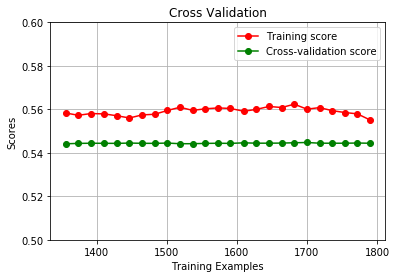

In [33]:
plt.figure()
plt.title("Cross Validation")
plt.xlabel("Training Examples")
plt.ylabel("Scores")
plt.grid()
plt.plot(train_size, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_size, valid_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.ylim(0.5, 0.6)
plot = plt.legend(loc="best")

## Transformation of tmhalfsc

In [2]:
reset -fs

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import BaggingRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
reduced = pd.read_csv("../reduced.csv")
reduced = reduced.drop(columns = reduced.columns[0])

In [7]:
X = reduced.drop(columns="scores")
y = reduced["scores"]

In [8]:
def get_log(col):
    log_col = []
    for i in range(len(col)):
        if col[i] != 0:
            log_col.append(np.log(col[i]))
        else:
            log_col.append(col[i])
    return log_col

In [9]:
log_tmhalf = get_log(X.tmhalfsc)
log_pred = get_log(X.predscores)
log_opp = get_log(X.opphalfsc)
log_y = get_log(y)
sqrt_tmhalf = np.sqrt(X.tmhalfsc)
sqrt_pred = np.sqrt(X.predscores)
sqrt_opp = np.sqrt(X.opphalfsc)

In [10]:
# X = X.drop(columns=["tmhalfsc", "predscores", "opphalfsc"])
X = X.drop(columns=["tmhalfsc"])
X["tmhalfsc"] = sqrt_tmhalf
# X["predscores"] = sqrt_pred
# X["opphalfsc"] = sqrt_opp

In [11]:
def rmse(pred, y):
    n = len(y)
    RMSE = np.sqrt(sum((pred - y)**2) / n)
    return RMSE

In [42]:
rmse_scores = []
r2_scores = []
rand_state = np.random.randint(0, 10000, 1000)
for i in rand_state:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    lr = LinearRegression().fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2_scores.append(lr.score(X_test, y_test))
    rmse_scores.append(rmse(pred, y_test))

In [43]:
scores = list(zip(rand_state, rmse_scores, r2_scores))

In [44]:
best_state = sorted(scores, key=lambda x: x[1])[0]
print("Models sorted on RMSE ascending:")
print(f"Random State: {best_state[0]}")
print(f"RMSE: {best_state[1]:.4f}")
print(f"R^2: {best_state[2]:.4f}")

Models sorted on RMSE ascending:
Random State: 9330
RMSE: 0.7508
R^2: 0.5611


In [45]:
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Median RMSE: {np.median(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")
print(f"Median R^2: {np.median(r2_scores)}")

Mean RMSE: 0.822257947737095
Median RMSE: 0.8232017323906825
Mean R^2: 0.5538074618492987
Median R^2: 0.5555925545997866


In [49]:
man_X = X[["predscores", "tmhalfsc", "patt", "ypa", "sack_yd_pct", "int_pct"]]
man_y = y

In [50]:
man_rmse_scores = []
man_r2_scores = []
for i in rand_state:
    man_X_train, man_X_test, man_y_train, man_y_test = train_test_split(man_X, man_y, test_size=0.25, random_state=i)
    man_lr = LinearRegression(fit_intercept=False, normalize=True).fit(man_X_train, man_y_train)
    man_pred = man_lr.predict(man_X_test)
    man_r2_scores.append(man_lr.score(man_X_test, man_y_test))
    man_rmse_scores.append(rmse(man_pred, man_y_test))

In [51]:
man_scores = list(zip(rand_state, man_rmse_scores, man_r2_scores))

In [52]:
best_state = sorted(man_scores, key=lambda x: x[1])[0]
print("Manual models sorted on RMSE ascending:")
print(f"Random State: {best_state[0]}")
print(f"Manual RMSE: {best_state[1]:.4f}")
print(f"Manual R^2: {best_state[2]:.4f}")

Manual models sorted on RMSE ascending:
Random State: 9330
Manual RMSE: 0.7657
Manual R^2: 0.5435


In [53]:
print(f"Manual mean RMSE: {np.mean(man_rmse_scores)}")
print(f"Manual median RMSE: {np.median(man_rmse_scores)}")
print(f"Manual mean R^2: {np.mean(man_r2_scores)}")
print(f"Manual median R^2: {np.median(man_r2_scores)}")

Manual mean RMSE: 0.8379847966763164
Manual median RMSE: 0.8381901706743291
Manual mean R^2: 0.5364180307573353
Manual median R^2: 0.5378642887273427


## Bagging Regression Iteratively

In [12]:
def run_model(model, X, y, num_iterations):
    rmse_scores = []
    r2_scores = []
    rand_state = np.random.randint(0, num_iterations*10, num_iterations)
    for i in rand_state:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
        my_model = model.fit(X_train, y_train)
        pred = my_model.predict(X_test)
        r2_scores.append(my_model.score(X_test, y_test))
        rmse_scores.append(rmse(pred, y_test))
    scores = list(zip(rand_state, rmse_scores, r2_scores))
    sorted_scores = sorted(scores, key=lambda x: x[1])
    return sorted_scores, rmse_scores, r2_scores

In [15]:
bag_lm = LinearRegression()
bag = BaggingRegressor(bag_lm, bootstrap=True, n_estimators=10)

In [16]:
scores, rmse_sc, r2_sc = run_model(bag, X, y, 1000)

In [17]:
scores[0]

(5865, 0.7573990323876896, 0.5790690943668102)

In [18]:
np.mean(rmse_sc)

0.8201438960910614

In [19]:
np.mean(r2_sc)

0.5313965583493646

# Split into Home and Away Models

## Home Model

In [20]:
split = int(len(reduced) / 2)

In [21]:
home_data = reduced.iloc[0:split,]

In [22]:
home_X = home_data.drop(columns="scores")
home_y = home_data["scores"]

In [23]:
home_sqrt_tmhalf = np.sqrt(home_X.tmhalfsc)
home_X["tmhalfsc"] = home_sqrt_tmhalf

In [24]:
home_bag_lm = LinearRegression()
home_bag = BaggingRegressor(home_bag_lm, bootstrap=True, n_estimators=10)

In [25]:
home_scores, home_rmse_sc, home_r2_sc = run_model(home_bag, home_X, home_y, 1000)

In [26]:
home_best_state = home_scores[0]
print("Models sorted on RMSE ascending:")
print(f"Random State: {home_best_state[0]}")
print(f"RMSE: {home_best_state[1]:.4f}")
print(f"R^2: {home_best_state[2]:.4f}")

Models sorted on RMSE ascending:
Random State: 262
RMSE: 0.6992
R^2: 0.6076


In [27]:
print(f"Mean RMSE: {np.mean(home_rmse_sc)}")
print(f"Median RMSE: {np.median(home_rmse_sc):.4f}")
print(f"Mean R^2: {np.mean(home_r2_sc):.4f}")
print(f"Median R^2: {np.median(home_r2_sc):.4f}")

Mean RMSE: 0.800062692605205
Median RMSE: 0.8003
Mean R^2: 0.5464
Median R^2: 0.5494


## Away Model

In [28]:
away_data = reduced.iloc[split:len(reduced),]

In [29]:
away_X = away_data.drop(columns="scores")
away_y = away_data["scores"]

In [30]:
away_sqrt_tmhalf = np.sqrt(away_X.tmhalfsc)
away_X["tmhalfsc"] = away_sqrt_tmhalf

In [31]:
away_bag_lm = LinearRegression()
away_bag = BaggingRegressor(away_bag_lm, bootstrap=True, n_estimators=10)

In [32]:
away_scores, away_rmse_sc, away_r2_sc = run_model(away_bag, away_X, away_y, 1000)

In [33]:
away_best_state = away_scores[0]
print("Models sorted on RMSE ascending:")
print(f"Random State: {away_best_state[0]}")
print(f"RMSE: {away_best_state[1]:.4f}")
print(f"R^2: {away_best_state[2]:.4f}")

Models sorted on RMSE ascending:
Random State: 232
RMSE: 0.7476
R^2: 0.5319


In [34]:
print(f"Mean RMSE: {np.mean(away_rmse_sc)}")
print(f"Median RMSE: {np.median(away_rmse_sc):.4f}")
print(f"Mean R^2: {np.mean(away_r2_sc):.4f}")
print(f"Median R^2: {np.median(away_r2_sc):.4f}")

Mean RMSE: 0.8481006920485222
Median RMSE: 0.8481
Mean R^2: 0.4893
Median R^2: 0.4924
